In [1]:
from sklearn.datasets import load_files

reviews_train = load_files('aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files('aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target

In [4]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=2000, max_df=.15)
X = vect.fit_transform(text_train)

In [6]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)

In [7]:
lda.components_.shape

(10, 2000)

In [9]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [10]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
horror        role          us            young         didn          
killer        cast          family        woman         thought       
guy           performance   between       girl          saw           
budget        actors        own           wife          am            
nothing       john          real          father        got           
doesn         actor         may           gets          thing         
pretty        performances  our           mother        actors        
re            excellent     world         husband       book          
low           director      director      home          money         
gore          quite         seems         old           minutes       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
show

In [11]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

In [12]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
police        comedy        audience      zombie        musical       war           genre         
bruce         laugh         fails         dead          songs         army          slow          
justice       laughs        ending        zombies       numbers       military      quite         
list          funny         tries         horror        song          soldiers      director      
god           friends       spoiler       gore          sky           soldier       sequences     
action        comedies      new           flick         number        men           nice          
officer       laughing      except        flesh         music         political     set           
sean          humor         daniel        scary         singing       group         fans          
joe       

In [13]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")
    

b'Who the hell rests at night whilst walking in the desert and travels in the heat of the sun, and these people are supposed to be professional trackers/journeymen!! Who the hell rests at night whilst walking in the desert and travels in the heat of the sun, and these people are supposed to be professional trackers/journeymen!! Who the hell rests at night whilst walking in the desert and travels in the heat of the sun, and these people are supposed to be professional trackers/journeymen!! Who the hell rests at night whilst walking in the desert and travels in the heat of the sun, and these people are supposed to be professional trackers/journeymen!! Who the hell rests at night whilst walking in the desert and travels in the heat of the sun, and these people are supposed to be professional trackers/journeymen!!.\n'
b'This is one of the worst movies I have ever seen! I saw it at the Toronto film festival and totally regret wasting my time. Completely unwatchable with no redeeming qualiti

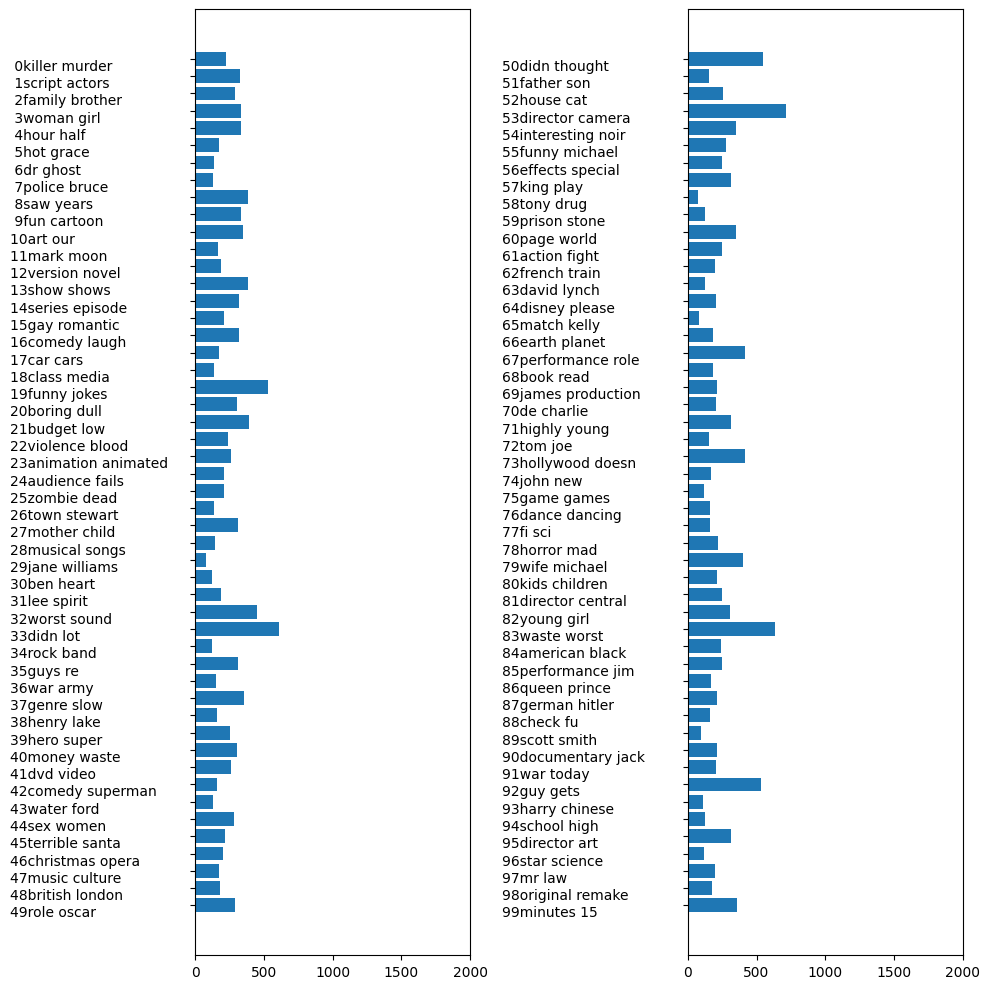

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()